<a href="https://colab.research.google.com/github/sachin7474/Visulization_and_prediction_of_COVID19_cases_and_deaths_in_Russia/blob/main/Visulization_and_prediction_of_COVID19_cases_and_deaths_in_Russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visulization and prediction of COVID19 cases and deaths in Russia

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files    #Uploading the excel file .
uploaded = files.upload()


Saving owid-covid-data.xlsx to owid-covid-data (1).xlsx


In [ ]:
data= pd.read_excel('/content/owid-covid-data.xlsx')

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [ ]:
dataframe=(data[['location','date','total_cases','new_cases','total_deaths','new_deaths',]])

In [ ]:
dataframe.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Aruba,2020-03-13,2.0,2.0,0.0,0.0
1,Aruba,2020-03-20,4.0,2.0,0.0,0.0
2,Aruba,2020-03-24,12.0,8.0,0.0,0.0
3,Aruba,2020-03-25,17.0,5.0,0.0,0.0
4,Aruba,2020-03-26,19.0,2.0,0.0,0.0


Creating the dataset

In [ ]:
dataset=dataframe.loc[28015:28236, :]

In [ ]:
dataset.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
28015,Russia,2020-01-02,0.0,0.0,0.0,0.0
28016,Russia,2020-01-03,0.0,0.0,0.0,0.0
28017,Russia,2020-01-04,0.0,0.0,0.0,0.0
28018,Russia,2020-01-05,0.0,0.0,0.0,0.0
28019,Russia,2020-01-06,0.0,0.0,0.0,0.0


In [ ]:
dataset.tail(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths
28232,Russia,2020-08-06,867343.0,5920.0,14532.0,181.0
28233,Russia,2020-08-07,871894.0,4551.0,14606.0,74.0
28234,Russia,2020-08-08,877135.0,5241.0,14725.0,119.0
28235,Russia,2020-08-09,882347.0,5212.0,14854.0,129.0
28236,Russia,2020-08-10,887536.0,5189.0,14931.0,77.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 28015 to 28236
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      222 non-null    object 
 1   date          222 non-null    object 
 2   total_cases   222 non-null    float64
 3   new_cases     222 non-null    float64
 4   total_deaths  222 non-null    float64
 5   new_deaths    222 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.5+ KB


In [ ]:
dataset.describe()

,total_cases,new_cases,total_deaths,new_deaths
count,222.000000,222.00000,222.000000,222.000000
mean,254959.144144,3997.90991,3630.418919,67.256757
std,309959.942600,3910.27445,4866.710530,73.898070
min,0.000000,0.00000,0.000000,0.000000
25%,2.000000,0.00000,0.000000,0.000000
50%,49942.000000,4662.50000,430.500000,41.500000
75%,535148.500000,7160.25000,7055.250000,133.000000
max,887536.000000,12640.00000,14931.000000,312.000000


In [ ]:
dataset=dataset.drop(['location'],axis=1)
dataset.head()

,date,total_cases,new_cases,total_deaths,new_deaths
28015,2020-01-02,0.0,0.0,0.0,0.0
28016,2020-01-03,0.0,0.0,0.0,0.0
28017,2020-01-04,0.0,0.0,0.0,0.0
28018,2020-01-05,0.0,0.0,0.0,0.0
28019,2020-01-06,0.0,0.0,0.0,0.0


Exploratory Data Analysis

1.Univariate Analysis

 plot for total cases in Russia

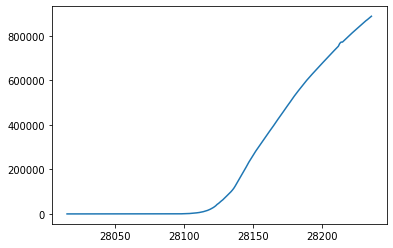

In [ ]:
plt.plot(dataset.total_cases)

In [ ]:
import plotly.express as px
fig=px.bar(dataset, x="date",y="total_cases", color="total_cases", orientation='v',height=600,title="Total cases in Russia",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

  plot fot new cases in Russia

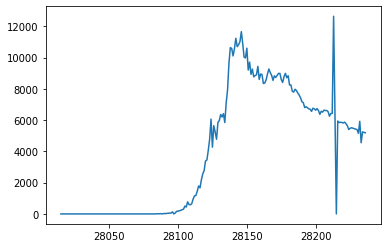

In [ ]:
plt.plot(dataset.new_cases)

In [ ]:
fig=px.bar(dataset, x="date",y="new_cases", color="new_cases", orientation='v',height=600,title="Daily new cases in Russia",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

 plot fot total deaths in Russia

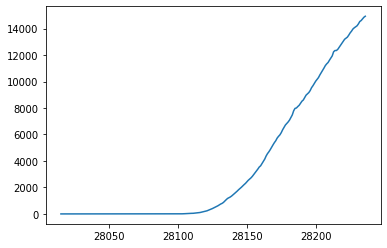

In [ ]:
plt.plot(dataset.total_deaths)

plot fot new deaths in Russia

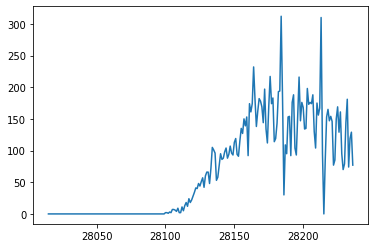

In [ ]:
plt.plot(dataset.new_deaths)

In [ ]:
fig=px.bar(dataset, x="date",y="new_deaths", color="new_deaths", orientation='v',height=600,title="New deaths in Russia",color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

2.Multivariate Analysis

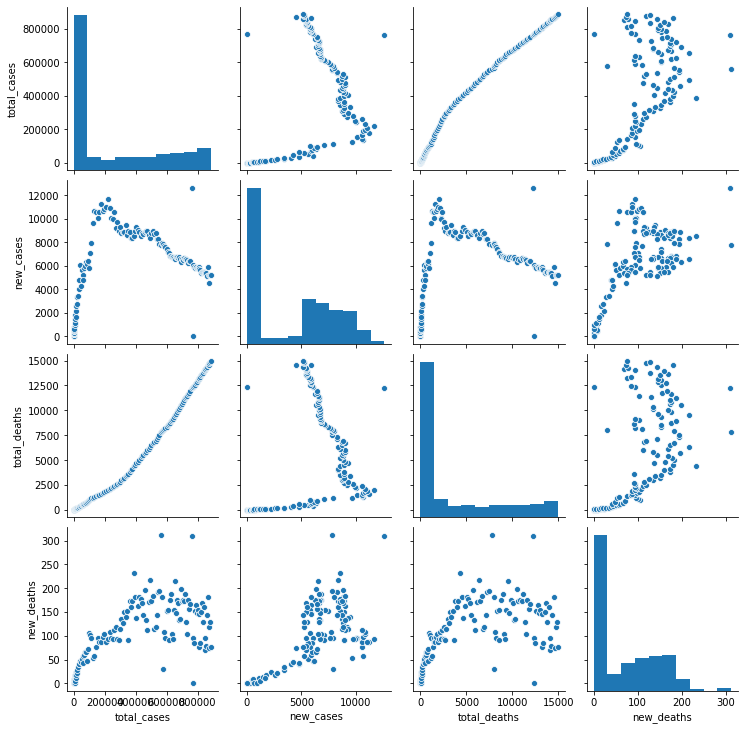

In [ ]:
sns.pairplot(dataset)

Above visulizations shows how cases and deaths are incresing  in Russia

In [ ]:
dataset=dataset.drop(['date'],axis=1)

Splitting the data in  training and testing

In [ ]:
X = dataset.drop(['new_cases','new_deaths'], axis=1)
Y = dataset['new_cases'].values

X.shape, Y.shape

((222, 2), (222,))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(155, 2) (67, 2) (155,) (67,)


Predictive Modelling

1.Linear Regression model

Predictive  Model for new cases


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model=LinearRegression()
reg_model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction=reg_model.predict(test_X)

print(prediction)

[10475.79144486  4747.16067395   898.13468104  9696.25420989
 10270.02961563   898.13468104  7461.84988056   898.26422961
   898.13468104   898.26422961  9822.64464632  8025.51439761
  9221.15545052  9330.16069027  1228.95569434  4482.39725832
   898.13468104   898.13468104   898.13468104   898.26422961
  4098.28090651  1443.16156987  1082.27360035  8691.23983554
  6455.57527045  9502.60539517   961.68385321   940.75615902
   898.26422961   898.26422961  4454.88618438  9974.97058752
  9533.16621008  6417.75223824   898.26422961  5592.23589045
  5639.75708228   898.26422961  8235.41910945   904.15868933
  7717.98924664   898.26422961  9706.27304119  3663.97130188
  8834.20936953   898.13468104  1389.52748927   898.26422961
   898.32900389   898.26422961   898.26422961   898.26422961
  6497.83391728   987.20540786  8941.62263807  9130.93377147
   898.13468104   898.26422961  9775.11321585  1641.93387617
   898.26422961   980.40922179   898.13468104   898.13468104
   898.26422961  5712.98

Evaluating the model performence

In [ ]:
print('Linear Regression Results for new cases: ')

train_score = reg_model.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = reg_model.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))




Linear Regression Results for new cases: 
Training Accuracy: 0.81
Testing Accuracy: 0.83


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print('MAE:',mean_absolute_error(prediction,test_Y))
print('MSE:',mean_squared_error(prediction,test_Y))


MAE: 1193.1072244293198
MSE: 2679251.6705010384


Plots for new cases between actual and predicted

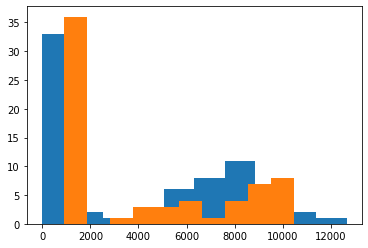

In [ ]:

plt.hist(test_Y)
plt.hist(prediction)
plt.show()

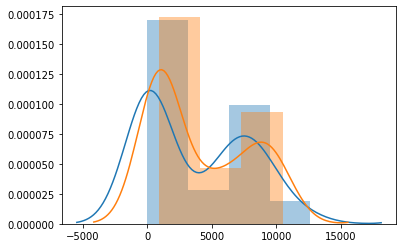

In [ ]:
sns.distplot(test_Y)
sns.distplot(prediction)

Predictive Model for new deaths

In [ ]:
U = dataset.drop(['new_cases','new_deaths'], axis=1)
V = dataset['new_deaths'].values

U.shape, V.shape

((222, 2), (222,))

In [ ]:
train_U, test_U, train_V, test_V = train_test_split(U, V, test_size=0.3, random_state=0)

In [ ]:
print(train_U.shape,test_U.shape,train_V.shape,test_V.shape)

(155, 2) (67, 2) (155,) (67,)


 2.Linear Regression model for new deaths

In [ ]:
reg_model2=LinearRegression()
reg_model2.fit(train_U,train_V)
prediction2=reg_model2.predict(test_U)

print(prediction2)

[102.86654357 125.68042537 146.85451852   3.91185694 155.58719796
 144.77041034   3.90477386   3.92956464   3.90654463   3.90300309
   4.34126862   3.90477386   3.90300309 128.30229354   3.90654463
 158.53476282  18.13636778 124.2035431  127.95976284   5.075875
  25.50212103 137.27732686  71.13568594   3.95878234   4.00393697
   3.90300309 150.85156097 155.62475086  65.20790855 148.60206062
   3.90477386  58.41924055   7.91510403  14.89058417   3.90300309
   3.90300309 143.50586865   3.90300309   3.98534389 153.15612107
   7.3913341  149.08986143   5.2025665  157.98016842 147.91486588
   3.90477386 150.72250079 147.19135124 127.19407752  47.48920701
 122.37701525 146.83109412 131.90509892   3.90300309   5.68626441
  22.30962343 141.03672912   3.90300309 129.71357429   3.90477386
 121.71172881   3.90300309  11.13150702  41.75772605   3.90565925
   3.90477386   3.90300309]


Evaluating the model performence

In [ ]:
print('Linear Regression Results for new deaths: ')

train_score2 = reg_model2.score(train_U, train_V)
print('Training Accuracy:', train_score2.round(2))
test_score2 = reg_model2.score(test_U, test_V)
print('Testing Accuracy:', test_score2.round(2))

Linear Regression Results for new deaths: 
Training Accuracy: 0.82
Testing Accuracy: 0.83


In [ ]:
print('MAE:',mean_absolute_error(prediction2,test_V))
print('MSE:',mean_squared_error(prediction2,test_V))

MAE: 18.55410963865646
MSE: 1071.7556637588614


Plots for new deaths between actual and predicted

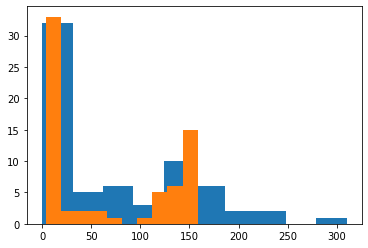

In [ ]:
plt.hist(test_V)
plt.hist(prediction2)
plt.show()

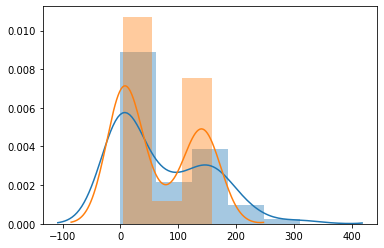

In [ ]:
sns.distplot(test_V)
sns.distplot(prediction2)

3.KNN model for new deaths

In [ ]:
from sklearn import neighbors

In [ ]:
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_model.fit(train_U, train_V)
    prediction3=knn_model.predict(test_U)
   

Evaluating the model performence

In [ ]:
print('KNN Regression Results for new deaths: ')

train_score3 = knn_model.score(train_U, train_V)
print('Training Accuracy:', train_score3.round(2))
test_score3 = knn_model.score(test_U, test_V)
print('Testing Accuracy:', test_score3.round(2))

KNN Regression Results for new deaths: 
Training Accuracy: 0.83
Testing Accuracy: 0.83


In [ ]:
print('MAE:',mean_absolute_error(prediction3,test_V))
print('MSE:',mean_squared_error(prediction3,test_V))

MAE: 16.67686567164179
MSE: 1030.1133208955223


Plots for new deaths between actual and predicted

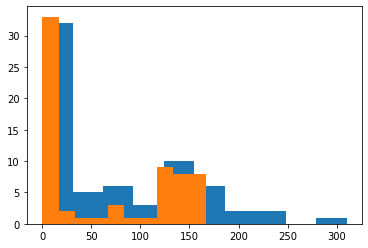

In [ ]:
plt.hist(test_V)
plt.hist(prediction3)
plt.show()

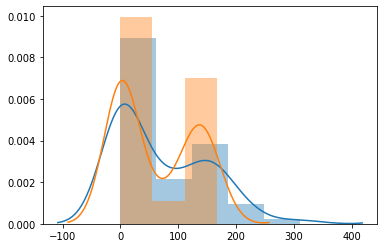

In [ ]:
sns.distplot(test_V)
sns.distplot(prediction3)

Analyzing above results it is concluded that KNN model is performing best among 3 models 